In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importamos los datos

X_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_train.csv", sep=',', decimal='.')
#X_val = pd.read_csv("./DatosAbandonoSinNan/X_val.csv", sep=',', decimal='.')
#y_val = pd.read_csv("./DatosAbandonoSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_test.csv", sep=',', decimal='.')

In [5]:
y_train.value_counts()

DROPOUT_RISK
0.0             4985
2.0             4985
1.0             2183
dtype: int64

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Con el siguiente código vamos a calcular la precisión obtenida en función del valor de k que empleemos, esto nos ayudará a seleccionar el valor del parámetro *n_neighbors*.

([<matplotlib.axis.XTick at 0x2543f2754b0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

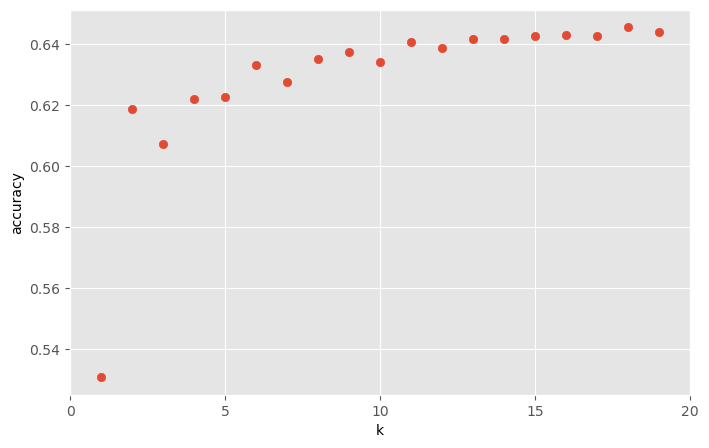

In [7]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Vemos que los mejores valores se obtienen con k igual a 16 seguido de k igual a 15.
Probamos con k=15 para que sea impar.

In [8]:
n_neighbors = 18

 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.65


In [9]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3175  198  944]
 [ 397   19  163]
 [ 500    8  832]]
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      4317
         1.0       0.08      0.03      0.05       579
         2.0       0.43      0.62      0.51      1340

    accuracy                           0.65      6236
   macro avg       0.43      0.46      0.44      6236
weighted avg       0.64      0.65      0.64      6236



In [10]:
from joblib import dump, load
dump(knn, 'knn_st.joblib') 
dump(scaler, 'Knn_Scaler.joblib')

['Knn_Scaler.joblib']